<h1>Imports</h1>

In [1]:
# Imports
from PIL import Image
from ultralytics import YOLO
import json
import numpy as np
import matplotlib.path as mpltPath
import csv
import matplotlib.pyplot as plt
import sys
import matplotlib.colors as mcolors
import cv2
import statistics
import os
import csv

<h1>Using YOLO to predict</h1>

In [4]:
# model_path = r"S:\Phys\FIV925 XSection\Datasets\Creed\01a\YO 553 0328 MAXI\map75=0296662 yolov9c  idx=1 ep=8 btch=16 rnd=4717152\weights\best.pt"
model_path = r"S:\Phys\FIV942 Adipo\Datasets\02h9\YO 512 0320 Snow\map75=0607616 YOLOv8n-segml idx=5 ep=52 btch=32 rnd=4670342\weights\best.pt"
# val_data = r"S:\Phys\FIV925 XSection\Datasets\Creed\toViz\nonGABA clusters_F1.ome0.bmp"
val_data = r"S:\Phys\FIV942 Adipo\Adipo2Viz 512"

adipo_seg = YOLO(model_path)
# adipo_seg.task = "segment"
predictions = adipo_seg.predict(val_data, show=False, max_det = 1000)
# with open(r"s:\check.json", "w") as text_file:
#     text_file.write(res.tojson())

#Instead, use dir(res), etc to get the segmentation regions directly.


image 1/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\001597.bmp: 512x512 64 Cells, 635 Droplets, 12.0ms
image 2/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\001598.bmp: 512x512 25 Cells, 227 Droplets, 9.0ms
image 3/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\001599.bmp: 512x512 16 Cells, 125 Droplets, 9.0ms
image 4/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\FIV942P3-5_FIV942P3.A - 4_17_0_0.bmp: 512x512 14 Cells, 88 Droplets, 10.5ms
image 5/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\FIV942P3-5_FIV942P3.D - 2_25_0_0.bmp: 512x512 42 Cells, 352 Droplets, 11.7ms
image 6/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\FIV942P3-5_FIV942P3.D - 4_7_0_0.bmp: 512x512 5 Cells, 26 Droplets, 10.2ms
image 7/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\kath0.bmp: 512x512 91 Cells, 835 Droplets, 12.2ms
image 8/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\kath10.bmp: 512x512 26 Cells, 227 Droplets, 10.0ms
image 9/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\kath20.bmp: 512x512 77 Cells, 618 Droplets, 9.0ms
image 10/10 S:\Phys\FIV942 Adipo\Adipo2Viz 512\kath21.bm

In [5]:
predictions

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Cell', 1: 'Droplet'}
 obb: None
 orig_img: array([[[ 0,  0, 31],
         [ 1,  1, 19],
         [ 0,  0, 22],
         ...,
         [ 1,  1, 26],
         [ 0,  0, 26],
         [ 0,  0, 25]],
 
        [[ 1,  1, 36],
         [ 1,  1, 39],
         [ 1,  1, 24],
         ...,
         [ 0,  0, 10],
         [ 0,  0, 27],
         [ 0,  0, 17]],
 
        [[ 0,  0, 44],
         [ 0,  0, 21],
         [ 0,  0, 28],
         ...,
         [ 0,  0, 24],
         [ 1,  1, 20],
         [ 0,  0, 21]],
 
        ...,
 
        [[ 1,  1, 29],
         [ 1,  1, 31],
         [ 1,  1, 18],
         ...,
         [ 0,  0,  8],
         [ 0,  0,  8],
         [ 1,  1, 28]],
 
        [[ 1,  1, 15],
         [ 0,  0, 27],
         [ 0,  0, 25],
         ...,
         [ 0,  0,  3],
         [ 1,  1, 28],
      

In [6]:
print(predictions[0].masks)

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,

In [7]:
predictions[0].boxes.xyxy

tensor([[211.3379,  18.0630, 226.3082,  33.9694],
        [167.1056, 157.5871, 176.8779, 167.3074],
        [339.3779,  54.0859, 354.0281,  68.4420],
        ...,
        [285.0888, 130.0208, 299.4696, 145.8218],
        [195.2696, 291.1003, 210.3659, 305.1351],
        [ 91.5331, 389.0002, 104.1501, 401.2816]], device='cuda:0')

In [8]:
# getting data for a single image
img1_data = predictions[0]
# img1_mask_coords = img1_data.masks.xy

In [9]:
img1_array = img1_data.plot(labels=False, boxes=True, masks=True)
img1 = Image.fromarray(img1_array[..., ::-1])
img1.show()

In [10]:
type(img1_data.names)

dict

<h2>Finding areas of each mask</h2>

In [ ]:
def polygon_area(coords):
    """
    Calculate the area of a polygon given its vertices using numpy.
    :param coords: A numpy array of shape (n, 2), where n is the number of vertices.
    :return: The area of the polygon.
    """
    x = coords[:, 0]
    y = coords[:, 1]
    i=np.arange(len(x))
    # 'shoelace' formula
    # return 0.5*np.abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1)))
    return np.abs(np.sum(x[i-1]*y[i]-x[i]*y[i-1])*0.5)

# Example list of numpy arrays as provided
polygons = img1_mask_coords

# Calculate the area for each polygon and store the results in a new list
areas = [polygon_area(polygon) for polygon in polygons]

print("Areas of the polygons:", areas)

print("# of polygons: ", len(areas))

<h2>Finding parents of each droplet</h2>

In [12]:
# changed from img1_classes = predictions[0].boxes.cls.numpy() to img1_classes = predictions[0].boxes.cls.cpu().numpy() because I was getting this error:
#   TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
img1_classes = predictions[0].boxes.cls.cpu().numpy()
print(img1_classes)

# Find indices where the value matches
class0_indices = np.where(img1_classes == 0)[0]
print("indices of class 0: ", class0_indices)
print("number of droplets: ", len(class0_indices))

class1_indices = np.where(img1_classes == 1)[0]
print("indices of class 1: ", class1_indices)
print("number of cells: ",len(class1_indices))

[          1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           0           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           0           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1 

In [13]:
img1_box_coords = img1_data.boxes.xyxy
# print(len(img1_box_coords))
img1_class0_bbox_coords = img1_box_coords[class0_indices]
# print(len(img1_class0_bbox_coords))
img1_class1_bbox_coords = img1_box_coords[class1_indices]
# print(len(img1_class1_bbox_coords))
# print(img1_class1_bbox_coords[0])
# print(img1_class1_bbox_coords.numpy()[0])

In [16]:
class1_parents = []

for class1_coord in img1_class1_bbox_coords.cpu().numpy():
    class1_instance_parents = []
    class0_id = 0
    print("the class1 instance: ", class1_coord)
    for class0_coord in img1_class0_bbox_coords.cpu().numpy():
        print("the class0 instance: ", class0_coord)
        if class1_coord[0] > class0_coord[2] or class1_coord[2] < class0_coord[0] or class1_coord[1] > class0_coord[3] or class1_coord[3] < class0_coord[1]:
            print("it wasn't a parent")
            class0_id += 1
            print("class0_id is now: ", class0_id)
            continue
        elif (class1_coord[0] > class0_coord[0] and class1_coord[0] < class0_coord[2] and class1_coord[1] > class0_coord[1] and class1_coord[1] < class0_coord[3]) or (class1_coord[2] < class0_coord[2] and class1_coord[2] > class0_coord[0] and class1_coord[3] > class0_coord[1] and class1_coord[3] < class0_coord[3]):
            class1_instance_parents.append(class0_indices[class0_id])
            print("it was an instance, we added ", class0_indices[class0_id])
            class0_id += 1
            print("now class0_id is: ", class0_id)
            
    class1_parents.append(class1_instance_parents)

the class1 instance:  [     211.34      18.063      226.31      33.969]
the class0 instance:  [     192.79      5.8847       220.9      35.119]
it was an instance, we added  44
now class0_id is:  1
the class0 instance:  [     482.76      433.73      511.63      469.89]
it wasn't a parent
class0_id is now:  2
the class0 instance:  [     93.096      112.79      117.05      141.88]
it wasn't a parent
class0_id is now:  3
the class0 instance:  [     460.98      24.754      497.67      60.443]
it wasn't a parent
class0_id is now:  4
the class0 instance:  [     266.72      31.886      299.86      56.537]
it wasn't a parent
class0_id is now:  5
the class0 instance:  [     283.09      210.48      315.54      241.75]
it wasn't a parent
class0_id is now:  6
the class0 instance:  [     181.76      431.53      218.09      470.04]
it wasn't a parent
class0_id is now:  7
the class0 instance:  [      264.2      302.72      302.48      335.79]
it wasn't a parent
class0_id is now:  8
the class0 instanc

In [17]:
print("parents of class 1: ", class1_parents) 

parents of class 1:  [[44], [202], [], [228], [157], [161], [530], [88], [198], [61], [197], [530], [367], [228], [679], [], [136], [], [287], [607, 635], [], [140], [285], [209], [], [111], [551], [356], [111], [161], [269], [111], [466, 607, 635, 678], [150], [198], [447], [140], [416], [450], [336], [433], [136], [337], [257], [530], [547], [44], [198], [341], [443], [157], [447], [507], [466, 607, 675], [371], [140], [150, 467], [481], [362], [171], [530], [171], [157], [467], [515], [88], [202], [157], [223], [209], [355], [341], [228], [467], [622], [228], [337], [447], [684], [99], [198], [675], [480], [466, 607, 635], [161], [], [], [285], [356], [433], [], [204], [264], [44], [269], [362], [], [223], [], [447], [433], [136], [], [140], [44], [433], [341], [466, 607, 635, 678], [], [150, 467], [119], [356], [228], [], [530], [287], [547], [547], [140, 468], [197], [468], [480], [287], [450], [530], [99], [209], [467], [551], [341], [507], [524], [468], [226], [548], [223], [371

<h2>Calculating pixel intensities</h2>

<h3>Mask pixel intensities</h3>

In [ ]:
image_path = r"S:\Phys\FIV942 Adipo\Adipo2Viz 512\001597.bmp"
image = Image.open(image_path)
image_array = np.array(image)

pixel_intensity_data = []
for mask_outline in range(len(img1_mask_coords)):
    vertices = img1_mask_coords[mask_outline]

    
    # Assuming image_array is a 2D numpy array for a grayscale image
    # For a color image, you need to decide how to handle the color channels

    # Create a mesh grid of coordinate values
    xx, yy = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))

    # Flatten the grid arrays
    x_flat = xx.flatten()
    y_flat = yy.flatten()

    # Create a list of (x, y) points from the flattened grid
    class1_points = np.vstack((x_flat, y_flat)).T

    # Create a path object from the vertices
    polygon_path = mpltPath.Path(vertices)

    # Use the path object to create a mask
    inside_polygon = polygon_path.contains_points(class1_points)

    # Reshape the mask back to the image shape
    mask = inside_polygon.reshape(xx.shape)

    # Apply the mask to select pixels within the polygon
    # selected_pixels = image_array[mask]

    # Sum the intensities of the selected pixels
    # sum_of_intensities = np.sum(selected_pixels)

    # print("Sum of pixel intensities in the polygonal region:", sum_of_intensities)
    # Initialize an array to hold the sum of intensities for each channel
    sum_of_intensities_per_channel = np.zeros(image_array.shape[2])

    # Iterate over each channel
    for i in range(image_array.shape[2]):
        # Apply the mask to the current channel and sum the intensities
        selected_pixels = image_array[:, :, i][mask]
        sum_of_intensities_per_channel[i] = np.sum(selected_pixels)

    print("Sum of pixel intensities in the polygonal region for each channel:", sum_of_intensities_per_channel)
    pixel_intensity_data.append(sum_of_intensities_per_channel)

In [16]:
image_path = r"S:\Phys\FIV942 Adipo\Adipo2Viz 512\001597.bmp"
image = Image.open(image_path)
image_array = np.array(image)
print(image_array.shape)

(512, 512, 3)


<h3>Box pixel intensities</h3>

In [5]:
image_path = r"S:\Phys\FIV925 XSection\Datasets\Creed\toViz\nonGABA clusters_F1.ome0.bmp"
# image_path = r"S:\Phys\FIV942 Adipo\Adipo2Viz 512\001597.bmp"
image = Image.open(image_path)
image_array = np.array(image)

In [6]:
def create_multichannel_array(folder_path):
    image_arrays = []
    image_names = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg','.bmp','.tif')):
                file_path = os.path.join(root, file)
                t_img = Image.open(file_path).convert('L')  # Convert to grayscale if not already
                t_arr = np.array(t_img)
                if t_arr.ndim == 2:  # Ensure the image is grayscale
                    image_arrays.append(t_arr)
                    image_names.append(file)
    
    if not image_arrays:
        return None  # Or raise an exception if you prefer

    # Stack the arrays along a new axis to create a multi-channel array
    multi_channel_array = np.stack(image_arrays, axis=-1)
    return multi_channel_array, image_names

# Use the function with your specific folder_path
folder_path = r"S:\Phys\FIV925 XSection\Datasets\Creed\Aligned"
image_array, image_names = create_multichannel_array(folder_path)


In [7]:
image_names

['nonGABA clusters_F1.ome0.bmp',
 'nonGABA clusters_F1.ome1.bmp',
 'nonGABA clusters_F1.ome10.bmp',
 'nonGABA clusters_F1.ome11.bmp',
 'nonGABA clusters_F1.ome12.bmp',
 'nonGABA clusters_F1.ome2.bmp',
 'nonGABA clusters_F1.ome3.bmp',
 'nonGABA clusters_F1.ome4.bmp',
 'nonGABA clusters_F1.ome5.bmp',
 'nonGABA clusters_F1.ome6.bmp',
 'nonGABA clusters_F1.ome7.bmp',
 'nonGABA clusters_F1.ome8.bmp',
 'nonGABA clusters_F1.ome9.bmp']

In [17]:

img1_box_centers = img1_data.boxes.xywh.numpy()

st = 'file, class, confidence, x, y, w, h, sum, avg, std\n'
box_intensity_data = []
for box_instance in range(len(img1_box_centers)):
    bbox_xywh = img1_data.boxes.xywh.numpy()[box_instance]
    bbox_corners = [[bbox_xywh[0] - bbox_xywh[2], bbox_xywh[1] + bbox_xywh[3]],[bbox_xywh[0] + bbox_xywh[2], bbox_xywh[1] + bbox_xywh[3]]
                , [bbox_xywh[0] + bbox_xywh[2], bbox_xywh[1] - bbox_xywh[3]], [bbox_xywh[0] - bbox_xywh[2], bbox_xywh[1] - bbox_xywh[3]]]
    vertices = bbox_corners

    
    # Assuming image_array is a 2D numpy array for a grayscale image
    # For a color image, you need to decide how to handle the color channels

    # Create a mesh grid of coordinate values
    xx, yy = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))

    # Flatten the grid arrays
    x_flat = xx.flatten()
    y_flat = yy.flatten()

    # Create a list of (x, y) points from the flattened grid
    class1_points = np.vstack((x_flat, y_flat)).T

    # Create a path object from the vertices
    polygon_path = mpltPath.Path(vertices)

    # Use the path object to create a mask
    inside_polygon = polygon_path.contains_points(class1_points)

    # Reshape the mask back to the image shape
    mask = inside_polygon.reshape(xx.shape)

    # Apply the mask to select pixels within the polygon
    # selected_pixels = image_array[mask]

    # Sum the intensities of the selected pixels
    # sum_of_intensities = np.sum(selected_pixels)

    # print("Sum of pixel intensities in the polygonal region:", sum_of_intensities)
    # Initialize an array to hold the sum of intensities for each channel
    sum_of_intensities_per_channel = np.zeros(image_array.shape[2])
    avg_of_intensities_per_channel = np.zeros(image_array.shape[2])
    std_of_intensities_per_channel = np.zeros(image_array.shape[2])

    st +=  image_path + "," + '0' + "," + str(img1_data.boxes.conf[box_instance]) +"," + str(bbox_xywh[0])+ ',' + str(bbox_xywh[1])+ ',' + str(bbox_xywh[2])+ ',' + str(bbox_xywh[3])+ ','

    # Iterate over each channel
    for i in range(image_array.shape[2]):
        # Apply the mask to the current channel and sum the intensities
        selected_pixels = image_array[:, :, i][mask]
        sum_of_intensities_per_channel[i] = np.sum(selected_pixels)
        avg_of_intensities_per_channel[i] = np.average(selected_pixels)
        std_of_intensities_per_channel[i] = np.std(selected_pixels)
        st += str(sum_of_intensities_per_channel[i]) +"," + str(avg_of_intensities_per_channel[i]) + ',' + str(std_of_intensities_per_channel[i]) + ','

    print("Sum of pixel intensities in the polygonal region for each channel:", sum_of_intensities_per_channel)
    st += '\n'
    box_intensity_data.append(sum_of_intensities_per_channel)

Sum of pixel intensities in the polygonal region for each channel: [      12306       11294       10600       16208       17490         577        9887       10787       10676       12326        7418        5918        2858]
Sum of pixel intensities in the polygonal region for each channel: [       5273        3850        4629        4279        4663          98        2047        5313        8499       16802        4563        4091        2312]
Sum of pixel intensities in the polygonal region for each channel: [       7490        6234        7453        8108        9469         158        3549        8897       17606       33680        5654        8010        2255]
Sum of pixel intensities in the polygonal region for each channel: [       6173        6124        8096       14383       15869         154        4777        9502       13590       13897        6850        6524        2602]
Sum of pixel intensities in the polygonal region for each channel: [       5914        6034        6

In [12]:
bbox_xywh[1]

561.44104

In [9]:
image_array.shape

(687, 553, 13)

In [15]:
st

',file,0,tensor(0.9932),13.1991625,453.32532,7.0619907,6.6581726,12306.0,67.61538461538461,76.8760625557971811294.0,62.05494505494506,17.39007082960042210600.0,58.24175824175824,10.83932670888706616208.0,89.05494505494505,29.73947782797299817490.0,96.0989010989011,28.273217608847627577.0,3.17032967032967,1.17604239527888529887.0,54.324175824175825,26.8851723530388110787.0,59.26923076923077,9.58301143688625810676.0,58.65934065934066,13.76627490790428612326.0,67.72527472527473,19.0208479803493237418.0,40.75824175824176,5.0553869849821175918.0,32.51648351648352,7.5102313178443772858.0,15.703296703296703,7.7714531226304056\n,file,0,tensor(0.9932),549.1768,137.69733,6.048584,5.8756866,5273.0,48.824074074074076,48.493189423247443850.0,35.648148148148145,8.5182970985716154629.0,42.861111111111114,5.8838421771349464279.0,39.620370370370374,10.1504584758636994663.0,43.175925925925924,15.6429067487493798.0,0.9074074074074074,0.76421149192456852047.0,18.953703703703702,12.6075993098072775313.0,49

In [19]:
# Your CSV content as a string

# The path to the file where you want to save the CSV data
file_path = "S:\Phys\FIV925 XSection\Datasets\Creed\Aligned\output.csv"

# Writing the string to a file
with open(file_path, "w") as file:
    file.write(st)


In [6]:
# Drawing boxes with the given points in xyxy format
class0_points = img1_class0_bbox_coords.numpy()
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through each set of points to draw boxes
for i, point in enumerate(class0_points):
    # Calculate width and height of the box
    width = point[2] - point[0]
    height = point[3] - point[1]
    
    # Create a rectangle patch
    # print("droplet ", i, " parent ", class1_parents[i])
    # if not class1_parents[i]:
    #     continue
    # else:
    #     border_color = colors[class1_parents[i][0]]
    
    if max(pixel_intensity_data[class0_indices[i]]) == pixel_intensity_data[class0_indices[i]][0]:
        border_color = 'r'
    elif max(pixel_intensity_data[class0_indices[i]]) == pixel_intensity_data[class0_indices[i]][1]:
        border_color = 'g'
    elif max(pixel_intensity_data[class0_indices[i]]) == pixel_intensity_data[class0_indices[i]][2]:
        border_color = 'b'
    else:
        border_color = 'k'
    rect = plt.Rectangle((point[0], point[1]), width, height, linewidth=1, edgecolor=border_color, facecolor='none')
    
    # Add the rectangle patch to the Axes
    ax.add_patch(rect)
    
    # Add a label to each box
    # label_x = point[1] + (height / 2)
    # label_y = point[0] + (width / 2)
    # ax.text(label_y, label_x, f"{class1_indices[i]}", ha='center', va='center', color='blue')

# Setting the plot limits to include all boxes comfortably
plt.xlim(0, 512)
plt.ylim(0, 512)

plt.title('Class 0 Boxes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()

plt.show()

NameError: name 'img1_class0_bbox_coords' is not defined

In [ ]:
# Drawing boxes with the given points in xyxy format
class1_points = img1_class1_bbox_coords.numpy()
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through each set of points to draw boxes
for i, point in enumerate(class1_points):
    # Calculate width and height of the box
    width = point[2] - point[0]
    height = point[3] - point[1]
    
    # Create a rectangle patch
    # print("droplet ", i, " parent ", class1_parents[i])
    # if not class1_parents[i]:
    #     continue
    # else:
    #     border_color = colors[class1_parents[i][0]]
    
    if max(pixel_intensity_data[class1_indices[i]]) == pixel_intensity_data[class1_indices[i]][0]:
        border_color = 'r'
    elif max(pixel_intensity_data[class1_indices[i]]) == pixel_intensity_data[class1_indices[i]][1]:
        border_color = 'g'
    elif max(pixel_intensity_data[class1_indices[i]]) == pixel_intensity_data[class1_indices[i]][2]:
        border_color = 'b'
    else:
        border_color = 'k'
    rect = plt.Rectangle((point[0], point[1]), width, height, linewidth=1, edgecolor=border_color, facecolor='none')
    
    # Add the rectangle patch to the Axes
    ax.add_patch(rect)
    
    # Add a label to each box
    # label_x = point[1] + (height / 2)
    # label_y = point[0] + (width / 2)
    # ax.text(label_y, label_x, f"{class1_indices[i]}", ha='center', va='center', color='blue')

# Setting the plot limits to include all boxes comfortably
plt.xlim(0, 512)
plt.ylim(0, 512)

plt.title('Class 1 Boxes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()

plt.show()

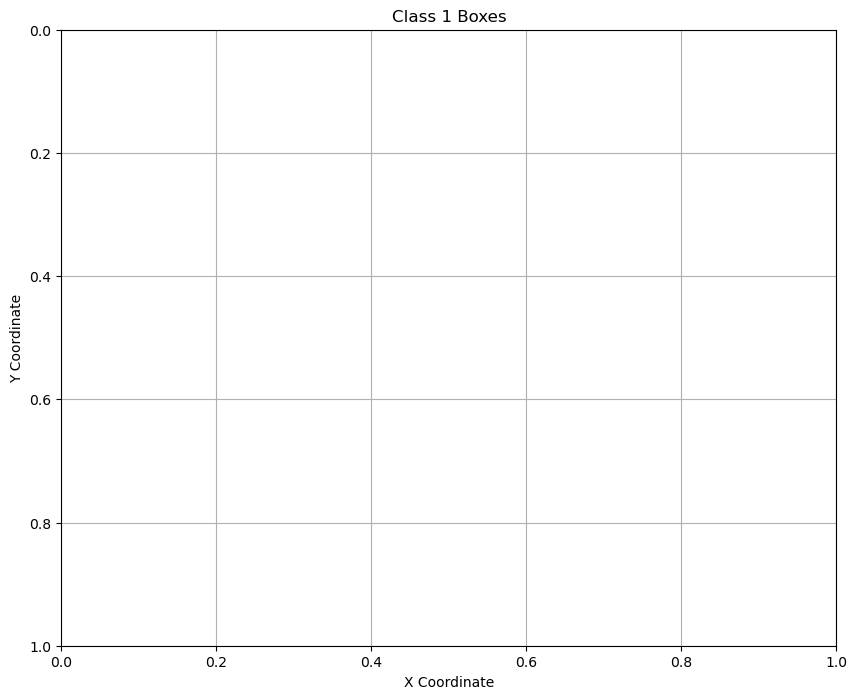

In [12]:
# Drawing boxes with the given points in xyxy format
class1_points = img1_box_coords.numpy()
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through each set of points to draw boxes
for i, point in enumerate(class1_points):
    # Calculate width and height of the box
    width = point[2] - point[0]
    height = point[3] - point[1]
    
    # Create a rectangle patch
    # print("droplet ", i, " parent ", class1_parents[i])
    # if not class1_parents[i]:
    #     continue
    # else:
    #     border_color = colors[class1_parents[i][0]]
    
    # if max(box_intensity_data[class1_indices[i]]) == box_intensity_data[class1_indices[i]][0]:
    #     border_color = 'r'
    # elif max(box_intensity_data[class1_indices[i]]) == box_intensity_data[class1_indices[i]][1]:
    #     border_color = 'g'
    # elif max(box_intensity_data[class1_indices[i]]) == box_intensity_data[class1_indices[i]][2]:
    #     border_color = 'b'
    # else:
    #     border_color = 'k'
    rect = plt.Rectangle((point[0], point[1]), width, height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the rectangle patch to the Axes
    ax.add_patch(rect)
    
    # Add a label to each box
    # label_x = point[1] + (height / 2)
    # label_y = point[0] + (width / 2)
    # ax.text(label_y, label_x, f"{class1_indices[i]}", ha='center', va='center', color='blue')

# Setting the plot limits to include all boxes comfortably
plt.xlim(0, 512)
plt.ylim(0, 512)

plt.title('Class 1 Boxes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
pixel_intensity_data

In [ ]:
box_intensity_data
for box in box_intensity_data:
    print(sum(box))

In [ ]:
box_intensity_data[:1]

<h2>Exporting mask data to csv file</h2>

In [ ]:
# need to add confidence score
header = ["FilePath", "PolyID","cls","Vertices","Number of Vertices","PolyArea","Sum Inten WV0","SumInten WV1", "SumInten WV2","BBox x","BBox y","BBox w","BBox h",
          "BBox intensity WV0", "BBox intensity WV1","BBox intensity WV2","Conf","PolySum", "PolyAvg", "PolyStDDev", "BoxSum", "BoxAvg", "BoxStDDev", "Parents"]
data = []

class1_counter = 0
for i in range(len(img1_classes)):
    # excluding nonexistent masks
    # if img1_mask_coords[i].size == 0:
    #     if img1_classes[i] == 1.0:
    #         class1_counter += 1
    #         print("the class of this mask is 1.0, class1 counter is now ", class1_counter)
    #     continue
    # else:
    cls = predictions[0].boxes[i].cls.numpy().item(0)
    vertices = polygons[i]
    numVertices = len(vertices)
    polyArea = areas[i]
    bbox_data = predictions[0].boxes[i].xywh.numpy()
    conf = predictions[0].boxes.conf.numpy().item(i)
    polySum = sum([pixel_intensity_data[i][0],pixel_intensity_data[i][1],pixel_intensity_data[i][2]])
    polyAvg = polySum / 3
    polyStdDev = statistics.pstdev([pixel_intensity_data[i][0],pixel_intensity_data[i][1],pixel_intensity_data[i][2]])
    boxSum = sum([box_intensity_data[i][0],box_intensity_data[i][1],box_intensity_data[i][2]])
    boxAvg = boxSum / 3
    boxStdDev = statistics.pstdev([box_intensity_data[i][0],box_intensity_data[i][1],box_intensity_data[i][2]])
    polygon_data = [image_path,i,cls,vertices,numVertices,polyArea,pixel_intensity_data[i][0],pixel_intensity_data[i][1],pixel_intensity_data[i][2]
                    , bbox_data.item(0), bbox_data.item(1), bbox_data.item(2), bbox_data.item(3),box_intensity_data[i][0],box_intensity_data[i][1],box_intensity_data[i][2]
                    ,conf, polySum, polyAvg, polyStdDev, boxSum, boxAvg, boxStdDev]
    if class1_indices.__contains__(i):
        # print(i)
        polygon_data.append(class1_parents[class1_counter])
        print("class1 index before increment: ", class1_counter)
        class1_counter += 1
        print("class1 index after increment: ", class1_counter)
    data.append(polygon_data)
    

filename = 'polygon_image_data_test.csv'
with open(filename, 'w', newline="") as file:
    csvwriter = csv.writer(file)
    csvwriter.writerow(header)
    csvwriter.writerows(data)